In [1]:
import matplotlib.pyplot as plt
from data_sources.nbac_fire_data_source import NbacFireDataSource
from boundaries.canada_boundary import CanadaBoundary
from data_sources.canada_boundary_data_source import CanadaBoundaryDataSource
from targets.fire_occurrence_target import FireOccurrenceTarget
from pathlib import Path
from osgeo import gdal

# Preview NBAC Fire Polygons

Canada boundary shapefile already downloaded, skipping download!


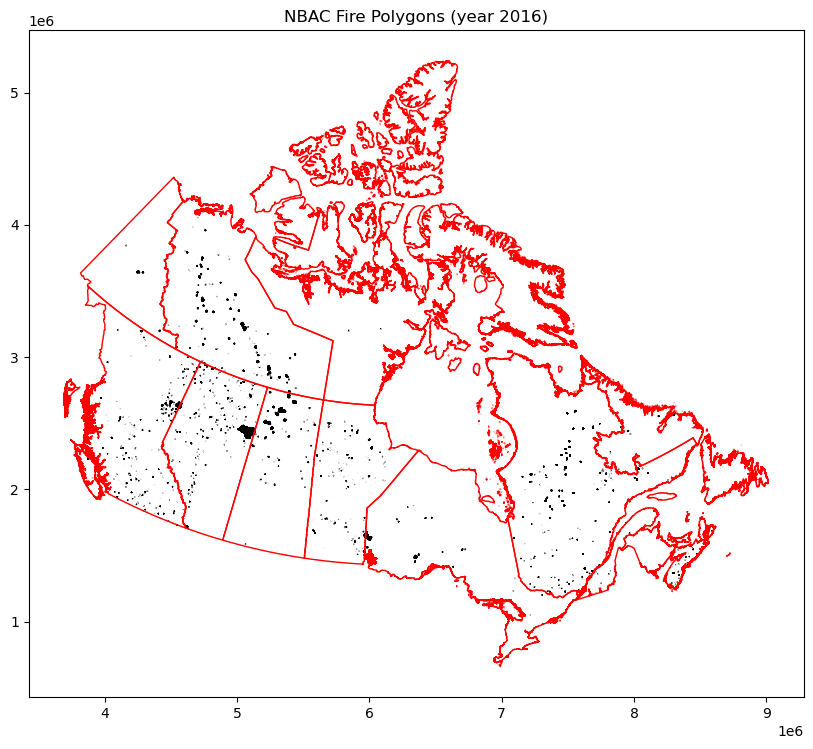

In [2]:
year = 2016
target_epsg = 3347
fire_data_source = NbacFireDataSource()
fire_polygons = fire_data_source.download(year)
fire_polygons = fire_polygons.to_crs(epsg=target_epsg)
canada = CanadaBoundary(CanadaBoundaryDataSource())
canada.load(exclude_area_above_60_degree=False)
canada.boundary = canada.boundary.to_crs(epsg=target_epsg)

fig, ax = plt.subplots(figsize=(10, 10))
fire_polygons.plot(ax=ax, edgecolor='k', facecolor='none')
canada.boundary.plot(ax=ax, edgecolor='r', facecolor='none')
plt.title(f"NBAC Fire Polygons (year {year})")
plt.show()

# Preview Fire Occurrences Target

Canada fire polygons already downloaded for year 2016, skipping download!
Canada boundary shapefile already downloaded, skipping download!


/home/user/micromamba/envs/wildfire/lib/python3.9/site-packages/osgeo/osr.py:410: FutureWarning: Neither osr.UseExceptions() nor osr.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


Successfully created target for year 2016!


Text(0.5, 1.0, 'Fire Occurrence Target (year 2016) at resolution 250m')

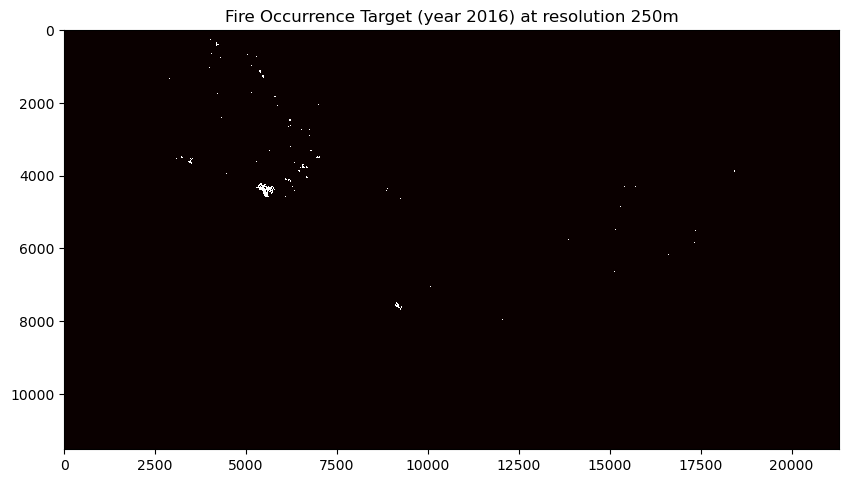

In [3]:
raw_data_path = Path("../data/raw/")
fire_data_source = NbacFireDataSource(raw_data_path)

canada_output_path = Path("../data/canada_boundary/")
canada = CanadaBoundary(CanadaBoundaryDataSource(canada_output_path))

resolution_in_meters = 250
fire_occurrence_target = FireOccurrenceTarget(
    fire_data_source=fire_data_source,
    canada=canada,
    resolution_in_meters=resolution_in_meters,
    target_epsg_code=target_epsg,
    output_folder_path=raw_data_path
)

fire_occurrence_target_file_path = fire_occurrence_target.generate(year=year)

fire_occurrence_target_ds = gdal.Open(str(fire_occurrence_target_file_path.resolve()))
fire_occurrence_target_band = fire_occurrence_target_ds.GetRasterBand(1)
fire_occurrence_target_data = fire_occurrence_target_band.ReadAsArray()

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(fire_occurrence_target_data, cmap='hot', interpolation='nearest')
ax.set_title(f"Fire Occurrence Target (year {year}) at resolution {resolution_in_meters}m")